In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import joblib

In [2]:
df = pd.read_csv('G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\state-farm-distracted-driver-detection\driver_imgs_list.csv')
df.head()

subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg

In [3]:
#checking the number of images in each categories
df['classname'].value_counts()


c0    2489
c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c1    2267
c9    2129
c7    2002
c8    1911
Name: classname, dtype: int64

In [4]:
#class description
class_def = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
    


In [5]:
base_dir = 'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\state-farm-distracted-driver-detection'
img_path = 'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\state-farm-distracted-driver-detection\imgs'
train_path = 'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\state-farm-distracted-driver-detection\imgs\\train'
test_path = 'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\state-farm-distracted-driver-detection\imgs\\test'

Class c0 : safe driving


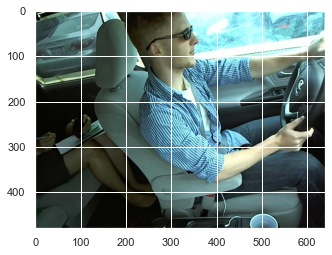



Class c1 : texting - right


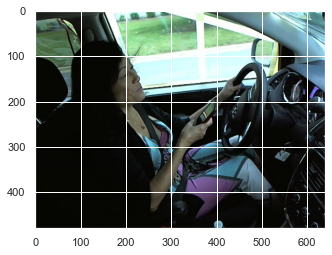



Class c2 : talking on the phone - right


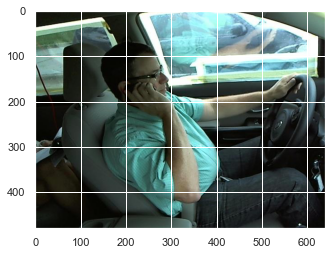



Class c3 : texting - left


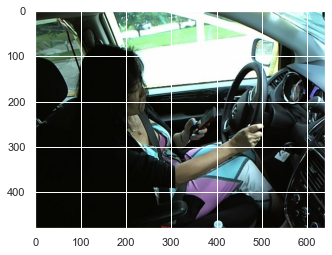



Class c4 : talking on the phone - left


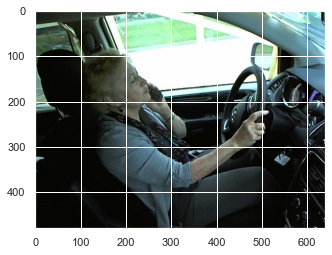



Class c5 : operating the radio


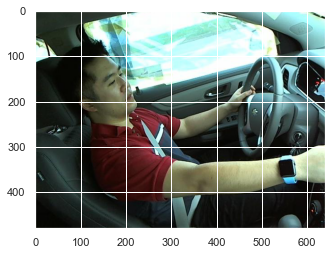



Class c6 : drinking


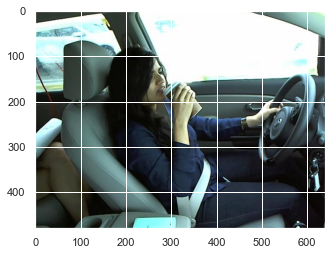



Class c7 : reaching behind


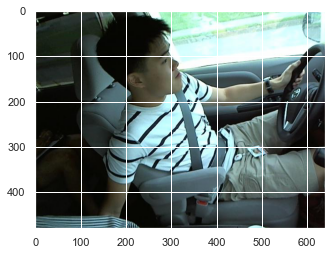



Class c8 : hair and makeup


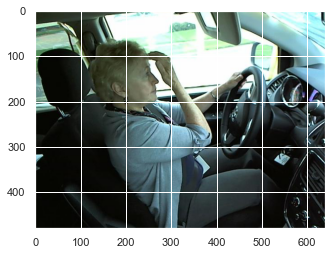



Class c9 : talking to passenger


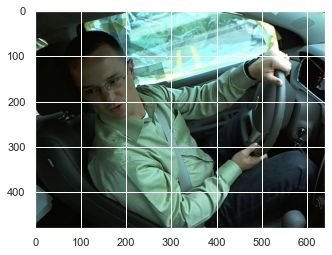

In [6]:
#plotting training image of each individual classs
for i in classes:
    print('Class', i, ':', class_def[i])
    path = os.path.join(train_path, i)
    
    for img in os.listdir(path):
        img_array = mpimg.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        print('\n')
        break
        

In [7]:
#shape of each image
img = Image.open(r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\state-farm-distracted-driver-detection\imgs\train\c0\img_34.jpg')
img.size

(640, 480)

In [8]:
#defining target image size and batch size
image_size = (240, 240)
batch_size = 32
val_size = 0.2

In [9]:
#create training data
#as it is mentioned in the question that we have to use some part of training data to evaluate our model
#hence, we will split  main training data into two - training & validation

train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = val_size)

train_generator = train_datagen.flow_from_directory(
                                                    train_path,
                                                    target_size = image_size,
                                                    class_mode = 'categorical',
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    seed = 10,
                                                    subset = 'training'
                                        
                                                  )


val_generator = train_datagen.flow_from_directory(
                                                    train_path,
                                                    target_size = image_size,
                                                    class_mode = 'categorical',
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    seed = 10,
                                                    subset = 'validation'
                                        
                                                  )



Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [10]:
#create testing data
#for testing data we will provide directory as img_path instead os test_path because test_path has no subdirectories only list of images
#and classes = ['test'] so that it will generate from test folder only

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
                                                    img_path,
                                                    target_size = image_size,
                                                    classes = ['test'],
                                                    batch_size = batch_size
                                                  )

Found 79726 images belonging to 1 classes.


In [11]:
for data_batch in train_generator:
    print(data_batch[0].shape)
    break
#as we can see that image shape is 240x240x3

(32, 240, 240, 3)


In [13]:
#building our model
model = keras.Sequential([
    
    #CNN1
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (240,240,3)),
    layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    layers.Dropout(0.2),
    
    #CNN2
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    layers.Dropout(0.2),
    
    #CNN3
    layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    layers.Dropout(0.2),
    
    #CNN4
    layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    layers.Dropout(0.2),
    
    
    #Hidden Layers 
    layers.Flatten(),
    layers.Dense(units = 1024, activation = 'relu'),
    layers.Dense(units = 512, activation = 'relu'),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dropout(0.2),
    
    #Output Layer
    layers.Dense(units = 10, activation = 'sigmoid'),
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 119, 119, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 59, 59, 64)        0

In [14]:
#compiling the model
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [14]:
#adding callback condition
cb = EarlyStopping(monitor = 'val_accuracy', patience = 3, min_delta = 0.01, verbose = 1)


In [15]:
#fiting the model
fitting = model.fit(train_generator, epochs = 4, steps_per_epoch = 200, validation_data = val_generator, validation_steps = 60, callbacks = [cb])
fitting

Epoch 1/4
200/200 [==============================] - 952s 5s/step - loss: 2.1896 - accuracy: 0.1635 - val_loss: 1.4686 - val_accuracy: 0.5208
Epoch 2/4
200/200 [==============================] - 1043s 5s/step - loss: 0.9406 - accuracy: 0.6694 - val_loss: 0.3919 - val_accuracy: 0.8724
Epoch 3/4
200/200 [==============================] - 1096s 5s/step - loss: 0.3231 - accuracy: 0.9044 - val_loss: 0.2219 - val_accuracy: 0.9323
Epoch 4/4
200/200 [==============================] - 1082s 5s/step - loss: 0.1937 - accuracy: 0.9412 - val_loss: 0.1036 - val_accuracy: 0.9698


In [19]:
val_loss = fitting.history['val_loss']
val_loss

[1.4686131477355957,
 0.39192405343055725,
 0.22190023958683014,
 0.10355119407176971]

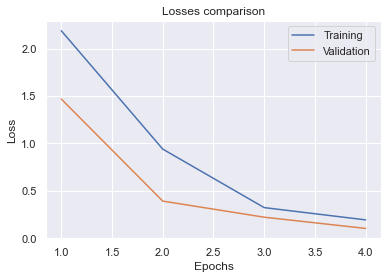

In [20]:
#plotting training & validation losses
training_loss = fitting.history['loss']
val_loss = fitting.history['val_loss']

epochs = [i for i in range(1,5)]

plt.plot(epochs, training_loss, label = 'Training')
plt.plot(epochs, val_loss, label ='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses comparison')
plt.show()

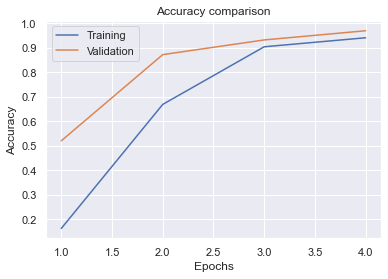

In [21]:
#plotting training & validation accuracy
training_acc = fitting.history['accuracy']
val_acc = fitting.history['val_accuracy']

epochs = [i for i in range(1,5)]

plt.plot(epochs, training_acc, label = 'Training')
plt.plot(epochs, val_acc, label ='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison')
plt.show()

In [22]:
model.save('ddd.h5')

In [15]:
loaded_model = load_model('ddd.h5')

In [16]:
#finding the index of specifies class
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'c0',
 1: 'c1',
 2: 'c2',
 3: 'c3',
 4: 'c4',
 5: 'c5',
 6: 'c6',
 7: 'c7',
 8: 'c8',
 9: 'c9'}

In [24]:
#predictiing for first batch of testing data
for data_batch in test_generator:
    pred = loaded_model.predict(data_batch[0])
    pred_indices = np.argmax(pred, axis = 1)
    break

1/1 [==============================] - 3s 3s/step


In [26]:
pred_indices

array([5, 0, 9, 6, 4, 3, 8, 1, 8, 5, 3, 8, 1, 3, 5, 4, 8, 8, 8, 2, 1, 4,
       9, 4, 9, 8, 1, 5, 9, 5, 1, 3], dtype=int64)

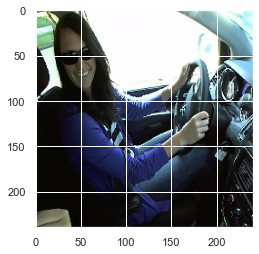

In [38]:
plt.imshow(data_batch[0][1])

In [42]:
data_batch[0].shape   #each batch has 32 images

(32, 240, 240, 3)

In [50]:
data_batch[0][1].shape     #of shape 240x240x3

(240, 240, 3)

In [ ]:
data = data_batch[0][1].shape

In [46]:
data_batch[1].shape

(32, 1)

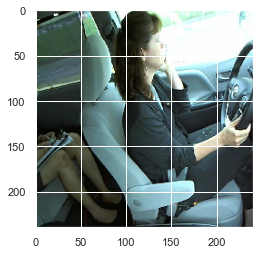

c5 operating the radio


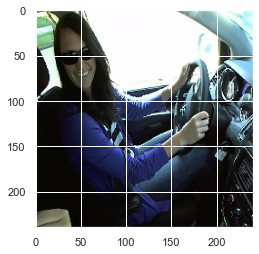

c0 safe driving


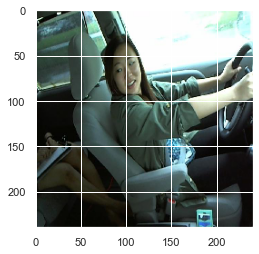

c9 talking to passenger


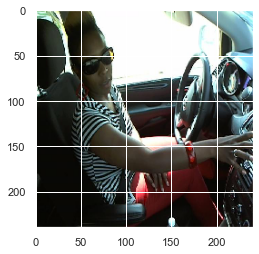

c6 drinking


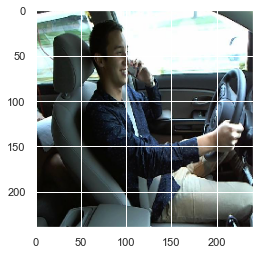

c4 talking on the phone - left


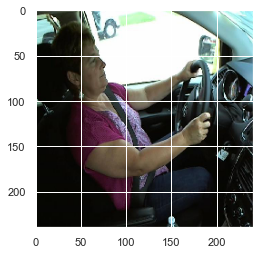

c3 texting - left


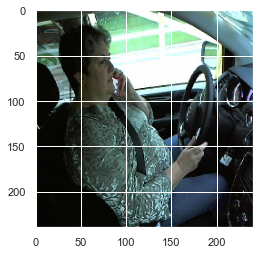

c8 hair and makeup


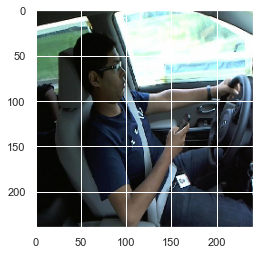

c1 texting - right


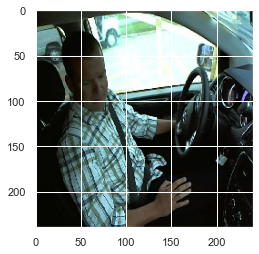

c8 hair and makeup


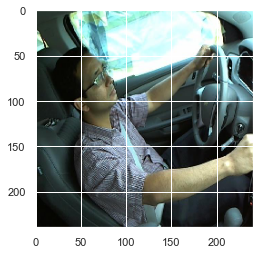

c5 operating the radio


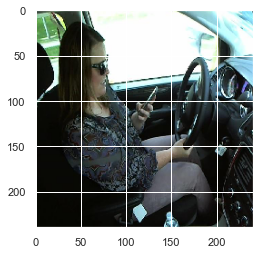

c3 texting - left


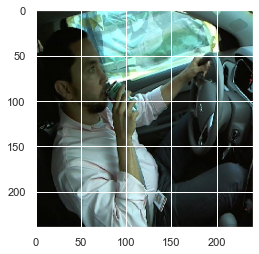

c8 hair and makeup


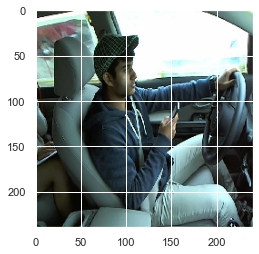

c1 texting - right


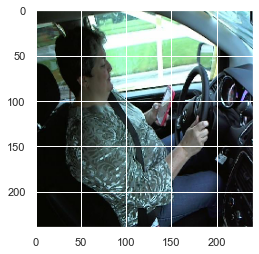

c3 texting - left


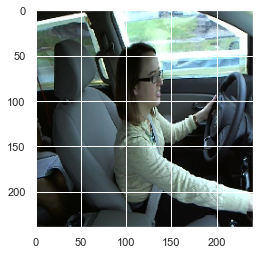

c5 operating the radio


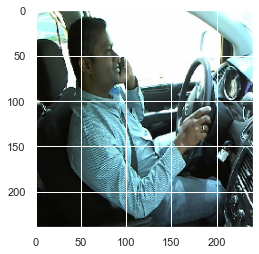

c4 talking on the phone - left


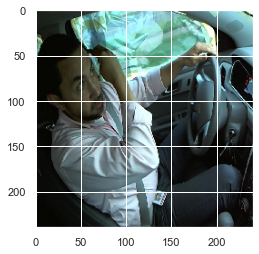

c8 hair and makeup


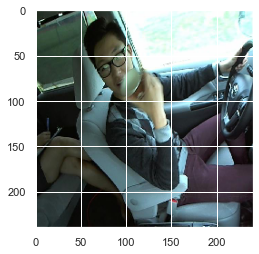

c8 hair and makeup


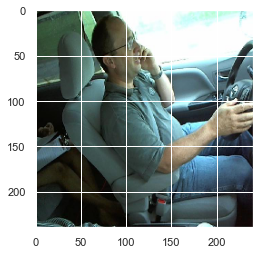

c8 hair and makeup


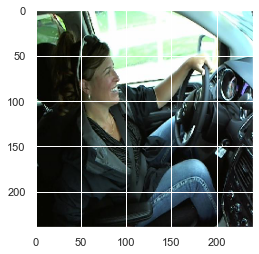

c2 talking on the phone - right


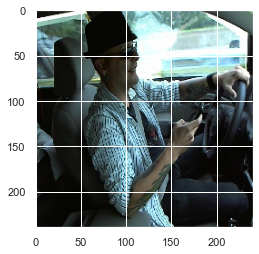

c1 texting - right


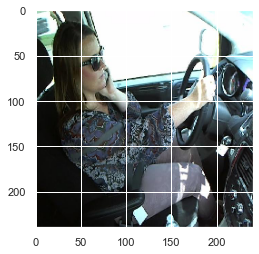

c4 talking on the phone - left


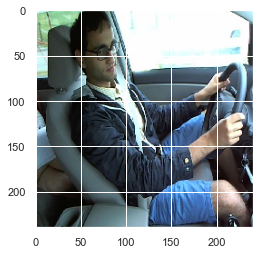

c9 talking to passenger


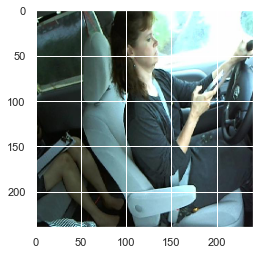

c4 talking on the phone - left


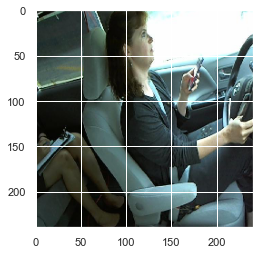

c9 talking to passenger


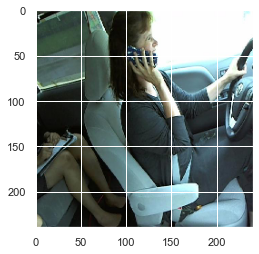

c8 hair and makeup


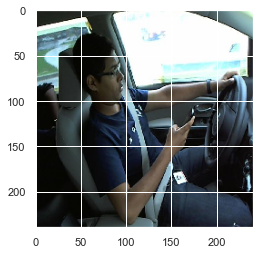

c1 texting - right


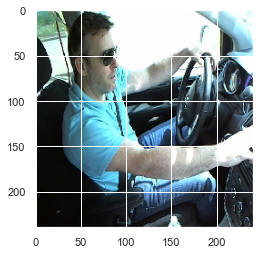

c5 operating the radio


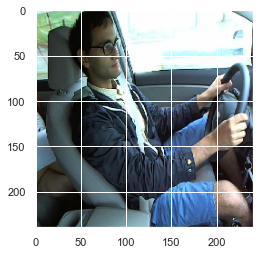

c9 talking to passenger


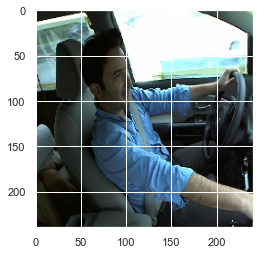

c5 operating the radio


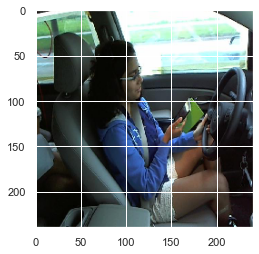

c1 texting - right


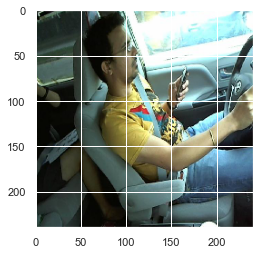

c3 texting - left


In [55]:
#plotting the first batch of testing images along with its prediction
i = 0
for i in range(data_batch[0].shape[0]):
    plt.imshow(data_batch[0][i])
    plt.show()
    index = pred_indices[i]
    value = labels[index]
    print(value, class_def[value])
    i += 1
    